In [138]:
from ggpoker_client import AoF_Client
import datetime
import mss
import pyautogui
import cv2
from functools import wraps
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import json


### Image processing

In [12]:


img2 = cv2.imread("assets/bet_amount_2.png",cv2.IMREAD_GRAYSCALE)
img3 = cv2.imread("assets/bet_amount_3.png",cv2.IMREAD_GRAYSCALE)

ref2 = cv2.imread("../../bet_amount_2_ref.png",cv2.IMREAD_GRAYSCALE)
ref3 = cv2.imread("../../bet_amount_3_ref.png",cv2.IMREAD_GRAYSCALE)


In [17]:
#show image in notebook
def show_image(img):
    plt.figure()
    plt.imshow(img, cmap='gray')
    plt.show()


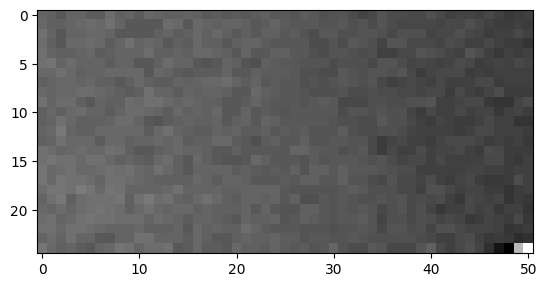

In [23]:
show_image(img3)

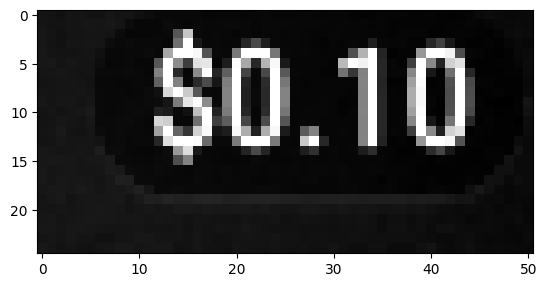

In [24]:
show_image(ref3)

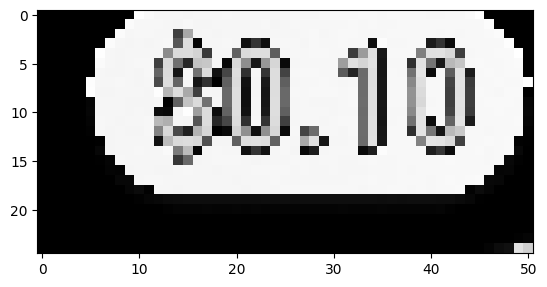

In [25]:
show_image(ref3-img3)

### Test Model querying

In [148]:
from bot import AoFModel

from poker_ai.poker.card import Card

In [149]:
def df_model(agent):
    df=pd.DataFrame(index=agent.keys(), data=agent.values())
    i=pd.DataFrame([json.loads(x) for x in df.index])
    df.reset_index(drop=True, inplace=True)
    df= pd.concat([df,i], axis=1)
    i=df.pop("history").apply(lambda x:  pd.Series(x))
    i.fillna({}, inplace=True)
    i=pd.concat([pd.json_normalize(i[n]) for n in i.columns], axis=1)
    i.fillna("", inplace=True)
    df=df.join(i)

    return df

In [150]:
model= AoFModel(path_model="models/aof_avg_round_5_2022_10_06_09_16_11_546798.joblib")


In [151]:
df=df_model(model.model)

/Users/antonkozackov/miniforge3/envs/poker_ai_x86/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


In [166]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df[df.portion_bet==0.3].value_counts("cards_cluster")

cards_cluster
0      15
125    15
95     15
100    15
105    15
110    15
115    15
120    15
130    15
5      15
135    15
140    15
145    15
150    15
155    15
160    15
90     15
85     15
80     15
75     15
70     15
65     15
60     15
55     15
50     15
45     15
40     15
35     15
30     15
25     15
20     15
15     15
10     15
165    15
dtype: int64

/Users/antonkozackov/miniforge3/envs/poker_ai_x86/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  
/Users/antonkozackov/miniforge3/envs/poker_ai_x86/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  
/Users/antonkozackov/miniforge3/envs/poker_ai_x86/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


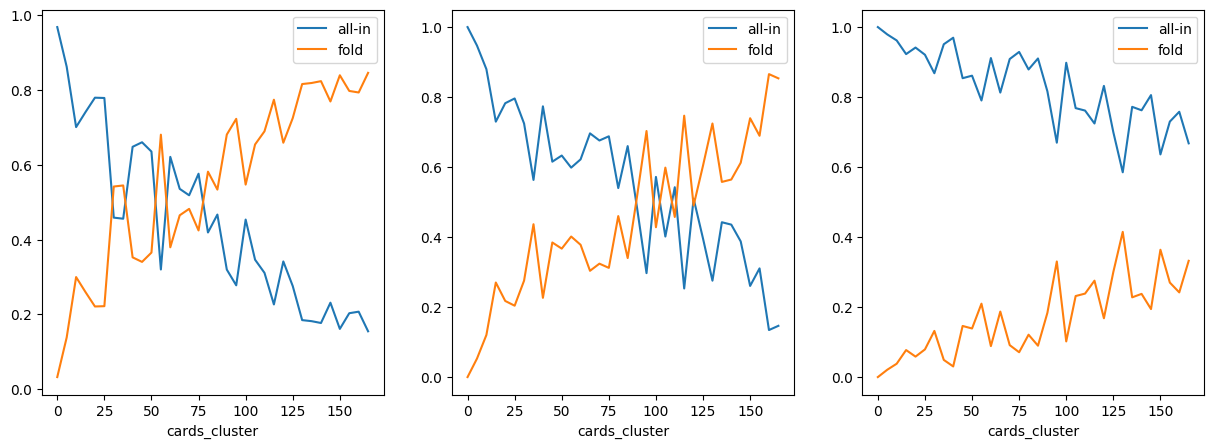

In [170]:


pd.set_option('display.float_format', lambda x: '%.3f' % x)

portion= 0.5
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for a, n in zip(range(3),[0.0,0.3,0.7]):
    df[(df.n_players == 4) & (df.portion_bet==n)].groupby("cards_cluster")["all-in","fold"].mean().plot(ax=axes[a])

In [178]:
model.model['{"n_players":4,"cards_cluster":10,"portion_bet":0.0,"history":[]}']

{'fold': 0.005120584294077541, 'all-in': 0.9948794157059226}

### Combine models

In [141]:
import joblib
from pathlib import Path

In [142]:
def get_model_strategy(model_path: str):
    with open(model_path, "rb") as input_file:
        a = joblib.load(input_file)
    return a["strategy"]

In [143]:


p2 = Path("../../aof_sit_go_2p_rankroud_5_avg_strat_2022_10_06_09_04_04_949401/agent.joblib")
p3 = Path("../../aof_sit_go_3p_rankroud_5_avg_strat_2022_10_05_22_55_09_451227/agent.joblib")
p4 = Path("../../aof_sit_go_4p_rankroud_5_avg_strat_2022_10_05_17_09_14_231090/agent.joblib")

In [144]:
d2 = get_model_strategy(p2)
d3 = get_model_strategy(p3)
d4 = get_model_strategy(p4)

In [145]:
aof_model_cumm= {**d2, **d3, **d4}

In [146]:
time = str(datetime.datetime.now())
for char in ":- .":
    time = time.replace(char, "_")

In [147]:
joblib.dump(aof_model_cumm, f"models/aof_avg_round_5_{time}.joblib")

['models/aof_avg_round_5_2022_10_06_09_16_11_546798.joblib']

### Measure time for mss vs pyautogui

Function took 0.3450 seconds


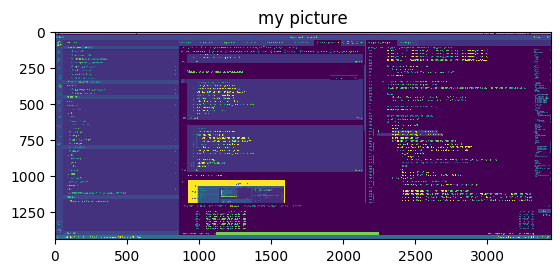

In [20]:
# time pyautogui.screenshot()
start_time = time.perf_counter()
img=np.array(pyautogui.screenshot())
img=cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
assert type(img) == np.ndarray
end_time = time.perf_counter()
total_time = end_time - start_time
print(f'Function took {total_time:.4f} seconds')
plt.imshow(img)
plt.title('my picture')
plt.show()

Function took 0.0427 seconds


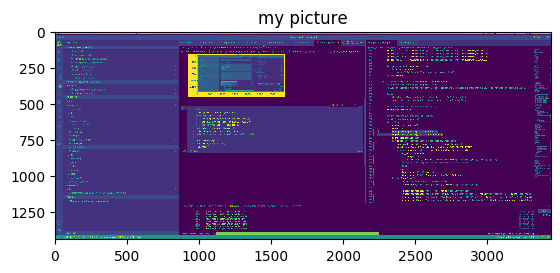

In [21]:
#time mss
start_time = time.perf_counter()
with mss.mss() as sct:
    img = np.array(sct.grab(sct.monitors[1]))
    img=cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    assert type(img) == np.ndarray
end_time = time.perf_counter()
total_time = end_time - start_time
print(f'Function took {total_time:.4f} seconds')

plt.imshow(img)
plt.title('my picture')
plt.show()

{'left': 0, 'top': 0, 'width': 3440, 'height': 1440}


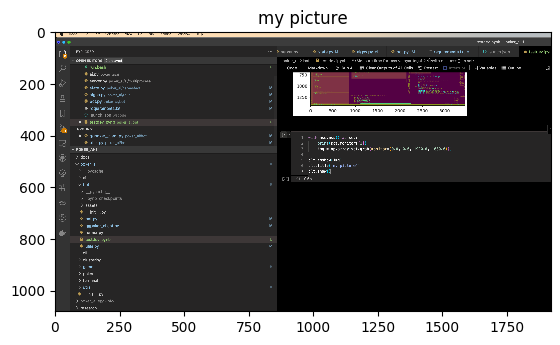

In [24]:
with mss.mss() as sct:
    print(sct.monitors[1])
    img = np.array(sct.grab(monitor=(0.0, 0.0, 1920.0, 1080.0)))

plt.imshow(img)
plt.title('my picture')
plt.show()